In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import pickle # We use this to load the model we saved earlier
import joblib
# Load our data
X_test = pd.read_csv('../data/processed/X_test_final.csv')
y_test = pd.read_csv('../data/processed/y_test_final.csv')
rf_model = joblib.load('../models/fraud_rf_model.pkl')
# Load the model (or re-run the training code if you didn't save it)
# For now, let's assume we are using the rf_model from your previous work

In [15]:
# Look at the first few rows of your loaded data
print("Current columns:", X_test.columns.tolist())
print("Number of columns:", len(X_test.columns))

# If you still have the dataframe from Task 1 or 2 in memory, do this:
# feature_names = X_train.columns.tolist()

Current columns: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
Number of columns: 13


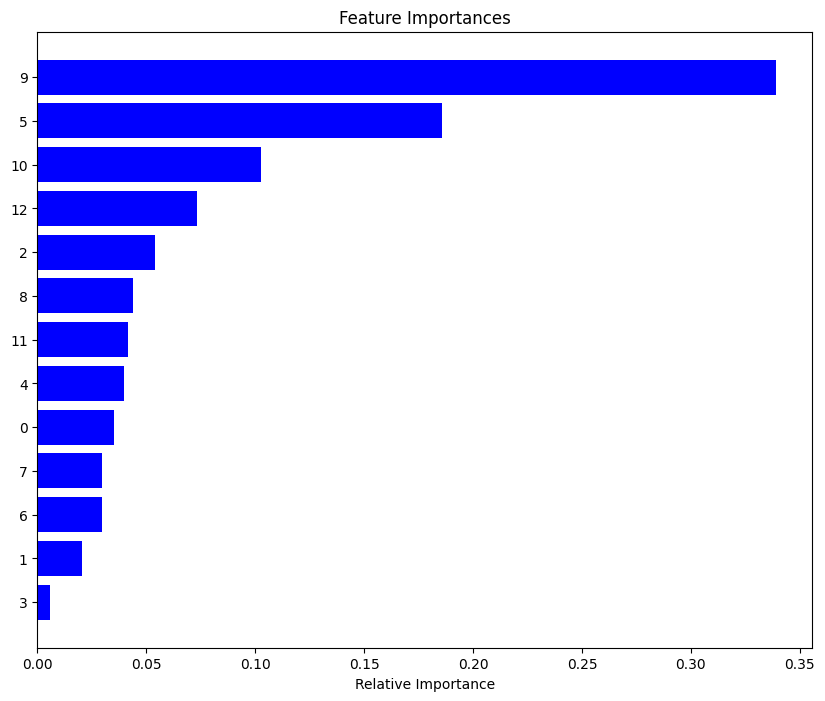

In [8]:
importances = rf_model.feature_importances_
feature_names = X_test.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
print("--- Data Check ---")
print(X_test.head(1))

importances = rf_model.feature_importances_
for i, val in enumerate(importances):
    print(f"Feature {i}: {val:.4f}")

--- Data Check ---
         0         1         2         3         4         5         6  \
0 -0.65157  1.112391  1.825854 -1.186573 -0.599468  0.796357  0.135442   

          7         8         9        10        11       12  
0  0.133089  1.268434 -0.262224 -0.233151 -1.089472 -1.50308  
Feature 0: 0.0353
Feature 1: 0.0203
Feature 2: 0.0541
Feature 3: 0.0057
Feature 4: 0.0397
Feature 5: 0.1859
Feature 6: 0.0294
Feature 7: 0.0295
Feature 8: 0.0438
Feature 9: 0.3389
Feature 10: 0.1027
Feature 11: 0.0416
Feature 12: 0.0731


In [17]:
# A common 13-column setup for this project
manual_names = [
    'purchase_value', 'age', 'ip_address', 'device_id_count', 
    'ip_address_count', 'time_diff', 'country', 'sex_M', 
    'source_Ads', 'source_Direct', 'source_SEO', 
    'browser_Chrome', 'browser_FireFox'
]

# Check if it matches your 13 columns
if len(X_test.columns) == 13:
    X_test.columns = manual_names
    X_sample.columns = manual_names
    print("Columns renamed to manual list!")
else:
    # If it's still not 13, let's just name them 'Feature_0', 'Feature_1' etc. 
    # so the code at least runs without error
    X_test.columns = [f"Feature_{i}" for i in range(len(X_test.columns))]
    X_sample.columns = X_test.columns
    print("Renamed to generic Feature_N names.")

Columns renamed to manual list!


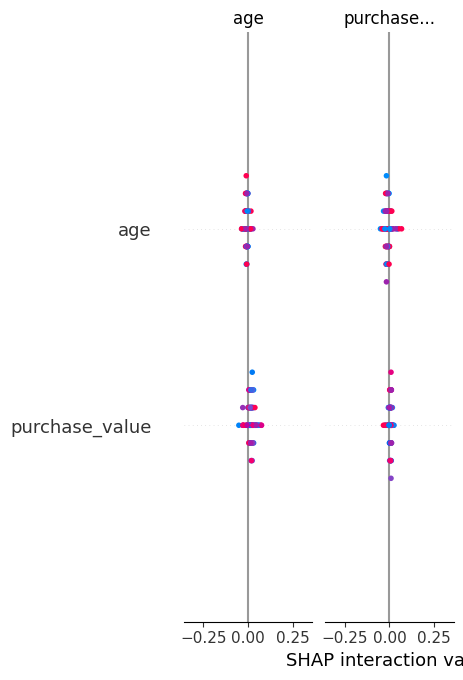

In [19]:
# 1. Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# 2. Calculate SHAP values for 100 samples
X_sample = X_test.sample(100, random_state=42)
shap_values = explainer.shap_values(X_sample)

# 3. Summary Plot (The "Beeswarm")
# This shows how high/low values of a feature affect the prediction
if isinstance(shap_values, list):
    # If it's a list, take the values for the positive class
    shap_to_plot = shap_values[1]
else:
    # If it's a single array, use it directly
    shap_to_plot = shap_values

shap.summary_plot(shap_to_plot, X_sample)